Matriz de confusión
===

* 5:00 min | Ultima modificación: Junio 22, 2019 | [YouTube]

Es una matriz donde las filas corresponden a la clase verdader y las columnas a la clase pronósticada, de tal forma, que permite evaluar la precisión para cada clase.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

             | Pronostico
             |  N     P
    ---------|------------
          N  |  TN    FP 
    Real     |
          P  |  FN    TP                        
    
    TP - Verdadero positivo (correcto)
    TN - Verdadero negativo (correcto)
    FN - Falso negativo (mal clasificado)
    FP - Falso positivo (mal clasificado)
    

In [1]:
#
# Cómputo de la matriz de confusión a partir
# de los valores reales y los pronósticos
#
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
y_pred = [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

confusion_matrix(
    y_true=y_true,
    y_pred=y_pred,
    #
    # Lista de labels para las filas de la matriz
    labels=None,
    #
    # Normaliza la matriz de confusión sobre las filas ('true'),
    # las columnas ('pred') o toda la matriz ('all')
    normalize=None,
).transpose()

array([[10,  3],
       [ 1,  1]])

In [2]:
tn, fp, fn, tp = confusion_matrix(
    y_true=y_true,
    y_pred=y_pred,
).ravel()

display(
    tn,
    fp,
    fn,
    tp,
)

10

1

3

1

Construcción a partir de un clasificador
---

In [3]:
from sklearn.datasets import load_iris
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=0,
)

clf = SVC(kernel="linear", C=0.01).fit(X_train, y_train)

cm = confusion_matrix(
    y_true=y_train,
    y_pred=clf.predict(X_train),
    #
    # Lista de labels para las filas de la matriz
    labels=None,
    #
    # Normaliza la matriz de confusión sobre las filas ('true'),
    # las columnas ('pred') o toda la matriz ('all')
    normalize=None,
)

cm

array([[37,  0,  0],
       [ 0, 24, 10],
       [ 0,  1, 40]])

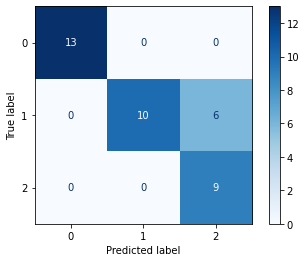

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)
plt.show()

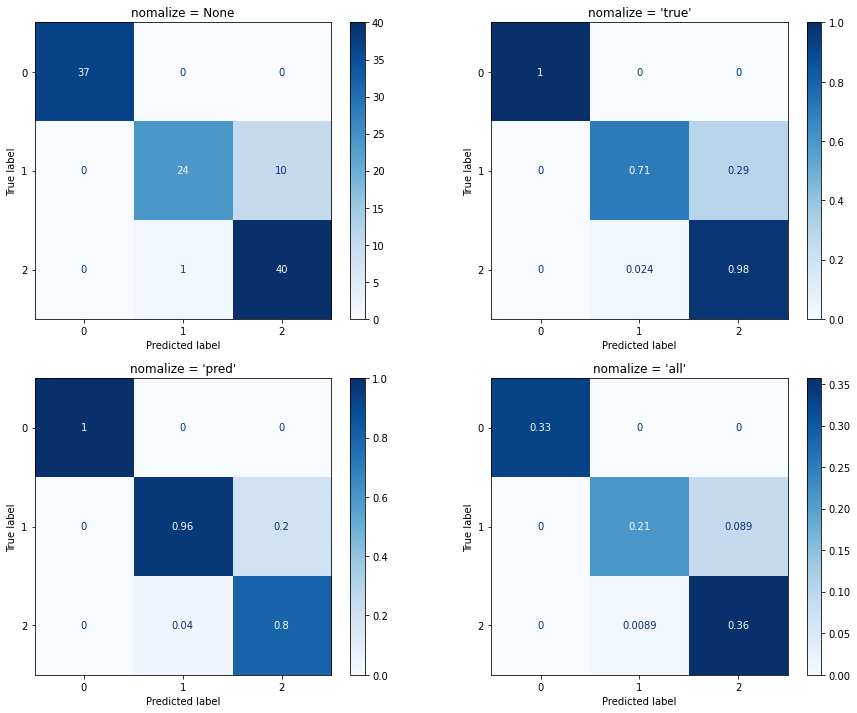

In [5]:
#
# Efectos de la normalización
#
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(15, 12))

for i_normalize, normalize in enumerate([None, "true", "pred", "all"]):

    cm = confusion_matrix(
        y_true=y_train,
        y_pred=clf.predict(X_train),
        labels=None,
        normalize=normalize,
    )

    ax = plt.subplot(2, 2, i_normalize + 1)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=clf.classes_,
    )
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.gca().set_title("nomalize = " + repr(normalize))